<a href="https://colab.research.google.com/github/Loganath399/Computer-Vision-with-OpenCV-for-Modern-AI/blob/main/activity%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt


In [8]:
IMG_SIZE = 128

image_folder = "/content/drive/MyDrive/segmentation/images/"
mask_folder = "/content/drive/MyDrive/segmentation/masks/"

images = []
masks = []

for file in os.listdir(image_folder):
    img_path = os.path.join(image_folder, file)
    mask_path = os.path.join(mask_folder, file)

    img = cv2.imread(img_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    images.append(img)

    mask = cv2.imread(mask_path, 0)
    mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))
    mask = mask / 255.0
    mask = np.expand_dims(mask, axis=-1)
    masks.append(mask)

X = np.array(images)
Y = np.array(masks)

print("Dataset Loaded:", X.shape, Y.shape)


Dataset Loaded: (5, 128, 128, 3) (5, 128, 128, 1)


In [9]:
model = models.Sequential()

# Encoder
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

# Decoder
model.add(layers.Conv2DTranspose(64, (3,3), strides=2, activation='relu', padding='same'))
model.add(layers.Conv2DTranspose(32, (3,3), strides=2, activation='relu', padding='same'))

# Output
model.add(layers.Conv2D(1, (1,1), activation='sigmoid', padding='same'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 64, 64, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 128, 128, 32)   │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 1)    │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,817 (292.25 KB)

 Trainable params: 74,817 (292.25 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(X, Y,
                    epochs=10,
                    batch_size=8,
                    validation_split=0.2)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9307 - loss: 0.6932 - val_accuracy: 0.9618 - val_loss: 0.6924
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9554 - loss: 0.6921 - val_accuracy: 0.9680 - val_loss: 0.6903
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9617 - loss: 0.6899 - val_accuracy: 0.9691 - val_loss: 0.6884
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.9629 - loss: 0.6878 - val_accuracy: 0.9694 - val_loss: 0.6864
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.9629 - loss: 0.6854 - val_accuracy: 0.9695 - val_loss: 0.6839
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.9624 - loss: 0.6825 - val_accuracy: 0.9687 - val_loss: 0.6811
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.9617 - loss: 0.6792 - val_accuracy: 0.9680 - val_loss: 0.6780
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.9609 - loss: 0.6754 - val_accuracy: 0.9671 - val_loss: 0.6744
E

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


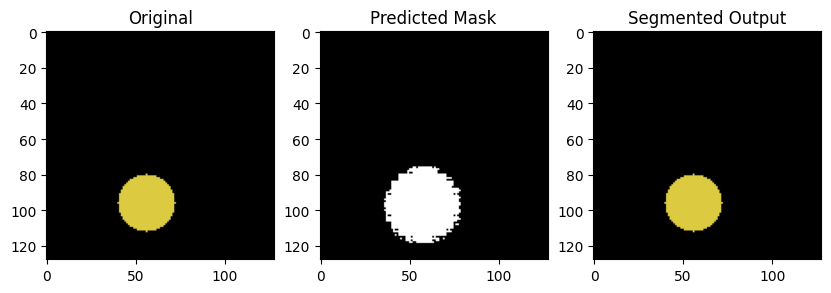

In [25]:
test_img = cv2.imread("/content/drive/MyDrive/segmentation/images/img1.png")

if test_img is None:
    print("Image not found! Check path.")
else:
    test_img_resized = cv2.resize(test_img, (IMG_SIZE, IMG_SIZE))
    test_img_norm = test_img_resized / 255.0
    test_img_input = np.expand_dims(test_img_norm, axis=0)

    prediction = model.predict(test_img_input)[0]
    prediction = (prediction > 0.5).astype(np.uint8)

    plt.figure(figsize=(10,4))

    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(cv2.cvtColor(test_img_resized, cv2.COLOR_BGR2RGB))

    plt.subplot(1,3,2)
    plt.title("Predicted Mask")
    plt.imshow(prediction[:,:,0], cmap='gray')

    plt.subplot(1,3,3)
    plt.title("Segmented Output")
    segmented = test_img_resized * prediction
    plt.imshow(cv2.cvtColor(segmented.astype(np.uint8), cv2.COLOR_BGR2RGB))

    plt.show()


In [26]:
import os
print(os.listdir("/content/drive/MyDrive/segmentation/"))


['masks', 'images']
